In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("main.csv", index_col=0)

In [3]:
df.head()

,Раздел,Слова,Важность,Компетенция,Блок
0,NaN,NaN,NaN,Информационные кабельные сети(юниоры),Информационные и коммуникационные технологии
1,1,Организация работ,5,Информационные кабельные сети(юниоры),Информационные и коммуникационные технологии
2,NaN,Специалист должен знать и понимать: \n Закон...,NaN,Информационные кабельные сети(юниоры),Информационные и коммуникационные технологии
3,NaN,Специалист должен уметь: \n Следовать правил...,NaN,Информационные кабельные сети(юниоры),Информационные и коммуникационные технологии
4,NaN, Проявлять энтузиазм в апробации новых метод...,NaN,Информационные кабельные сети(юниоры),Информационные и коммуникационные технологии


In [4]:
df = df.drop(["Раздел", "Важность"], axis=1)

In [5]:
df = df.dropna()

In [6]:
df = df[df["Слова"] != 'Всего']

In [7]:
print(df["Слова"][2583])

  контролировать наличие посторонних предметов (камней,


In [17]:
df = df.reset_index(drop=True)

In [18]:
uni = []
for i in range(len(df)):
    if "юниоры" in df["Компетенция"].iloc[i]:
        uni.append(i)

In [19]:
df = df.drop(uni) 

In [20]:
df = df.reset_index(drop=True)

In [21]:
df["Слова"] = df["Слова"].str.lower()

In [22]:
df = df.reset_index(drop=True)


In [23]:
df['Слова'] = df.Слова.str.replace(u'\W|\d', u' ')

In [24]:
print(df['Слова'].iloc[2])

специалист должен уметь      следовать правилам и стандартам безопасности      поддерживать безопасную рабочую обстановку   включая использование лестниц для выполнения работ  на высоте      использовать индивидуальные средства защиты      подбирать и использовать средства защиты от  электростатического разряда      безопасно подбирать  использовать  чистить и хранить  инструмент и оборудование      организовывать рабочее место для максимальной  эффективности производства работ и поддержания  чистоты      планировать и перепланировать задачи в соответствии  с меняющимися приоритетами      работать максимально эффективно  соблюдать  отраслевые стандарты  контролировать и проверять  результаты работы      постоянно заниматься профессиональным развитием   изучать и знать отраслевые стандарты  контролировать  обновление стандартов 


In [25]:
df

,Слова,Компетенция,Блок
0,организация работ,Информационные кабельные сети,Информационные и коммуникационные технологии
1,специалист должен знать и понимать законо...,Информационные кабельные сети,Информационные и коммуникационные технологии
2,специалист должен уметь следовать правила...,Информационные кабельные сети,Информационные и коммуникационные технологии
3,проявлять энтузиазм в апробации новых метод...,Информационные кабельные сети,Информационные и коммуникационные технологии
4,коммуникативные навыки,Информационные кабельные сети,Информационные и коммуникационные технологии
...,...,...,...
1878,при работе на фронтальном погрузчике и в движе...,Управление фронтальным погрузчиком,Транспорт и логистика
1879,контролировать наличие посторонних предмето...,Управление фронтальным погрузчиком,Транспорт и логистика
1880,пней ограждений и предупредительных знаков в ...,Управление фронтальным погрузчиком,Транспорт и логистика
1881,выявлять устранять и предотвращать при...,Управление фронтальным погрузчиком,Транспорт и логистика


In [26]:
import nltk

In [27]:
stop_words= nltk.corpus.stopwords.words('russian')

In [28]:
df['Слова'] = df['Слова'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [29]:
print(df['Слова'].iloc[5])

специалист должен знать понимать важность умения слушать части эффективного общения роли запросы коллег наиболее эффективные методы общения важность построения поддержания продуктивных рабочих взаимоотношений коллегами управляющими техники эффективной командной работы техники разрешения недопонимания конфликтных ситуаций процесс управления гневом стрессом разрешения конфликтных ситуаций


In [30]:
A=[]
for i in (df['Слова'].apply(lambda x: [word for word in x.split()])):
    for j in i:
        if j not in A:
            A.append(j)        

In [31]:
B={}
for i in A:
    B[i] = 0

In [32]:
for i in (df['Слова'].apply(lambda x: [word for word in x.split()])):
    for j in i:
        B[j]+=1

In [33]:
s = [(k, B[k]) for k in sorted(B, key=B.get, reverse=True)]

In [37]:
mb_w_2_del = []
for k, v in s:
    if v > 300:
        mb_w_2_del.append(k)

In [39]:
df['Слова'] = df['Слова'].apply(lambda x: ' '.join([word for word in x.split() if word not in (mb_w_2_del)]))

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder = LabelEncoder()

In [43]:
df["Блок"] = label_encoder.fit_transform(df["Блок"])

In [44]:
label_encoder_comp = LabelEncoder()
df["Компетенция"] = label_encoder.fit_transform(df["Компетенция"])

In [45]:
from sklearn.feature_extraction.text import HashingVectorizer
import pymorphy2

In [46]:
def f_tokenizer(s):
    morph = pymorphy2.MorphAnalyzer()
    if type(s) == "utf-8":
        t = s.split(' ')
    else:
        t = s
    f = []
    for j in t:
        m = morph.parse(j.replace('.',''))
        if len(m) != 0:
            wrd = m[0]
            if wrd.tag.POS not in ('NUMR','PREP','CONJ','PRCL','INTJ'):
                f.append(wrd.normal_form)
    return f

In [47]:
coder = HashingVectorizer(tokenizer=f_tokenizer, n_features=100)

In [64]:
trn = coder.fit_transform(df["Слова"]).toarray()

In [80]:
trn

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11738222, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11178914, 0.        , 0.        , ..., 0.        , 0.        ,
        0.03992469],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [81]:
data = pd.DataFrame(data=trn)

In [76]:
target_comp = df["Компетенция"]

0       26
1       26
2       26
3       26
4       26
        ..
1878    96
1879    96
1880    96
1881    96
1882    96
Name: Компетенция, Length: 1883, dtype: int32


In [83]:
data["tar"] = target_comp

In [84]:
data.to_csv("data.csv")

In [54]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [56]:
corr = train.corr()

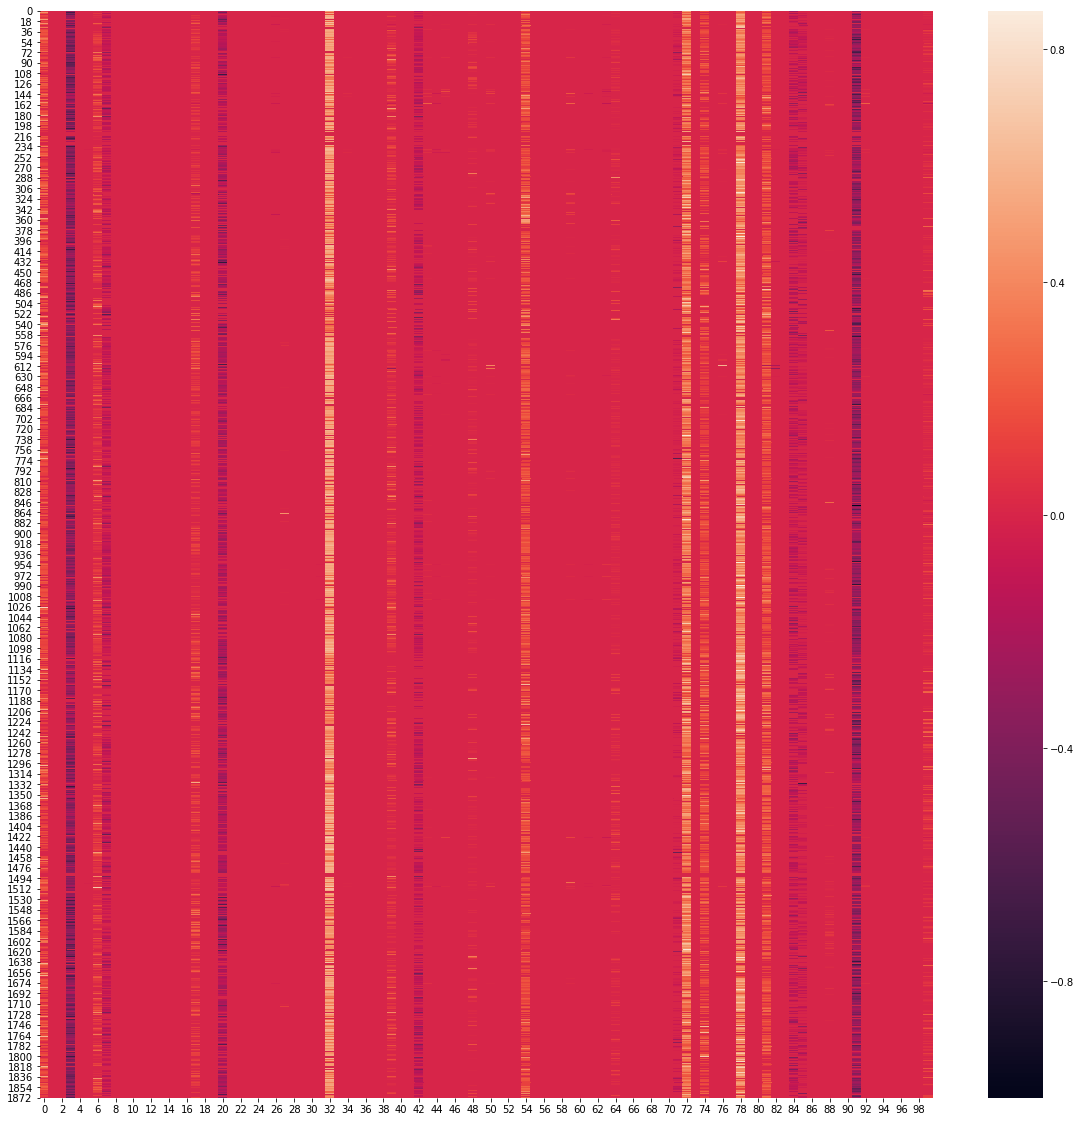

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(train)